# **Viewing classes in Directory**





In [1]:
import os

import matplotlib.pyplot as plt

from PIL import Image

import math

dir_example = "Data"

classes = os.listdir(dir_example)
print(classes)

['README.md', 'Test', 'Train']


In [2]:
dir_example = "Data/Train"

train_classes = os.listdir(dir_example)

print(train_classes)

['glass', 'cardboard', 'plastic', 'metal', 'paper', 'trash']


# **Visualizing Images in Dataset from each class**

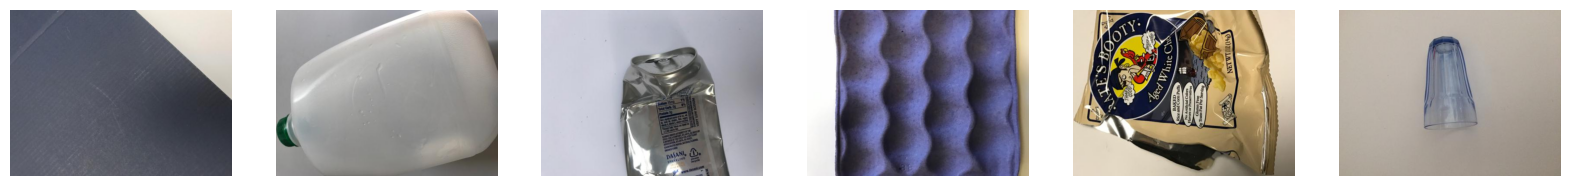

In [3]:
dir_with_examples = 'visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 100, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# **Importing required Libraries for Model**

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

2023-05-14 18:15:20.850293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 18:15:23.036847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-14 18:15:23.036980: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-14 18:15:23.036991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

# **Data Configuration**

In [5]:
train = 'Data/Train'
test = 'Data/Test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [6]:
# 
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2184 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [7]:
test_generator = ImageDataGenerator(rescale = 1/255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [8]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((32, 300, 300, 3), (32,))

In [9]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

# **Writing the labels into a text file '*Labels.txt* '**

In [10]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# **Model Architecture**

In [11]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

2023-05-14 18:15:26.682175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

# **Model Compilation**

In [12]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [13]:
model.fit_generator(
    train_generator,
          epochs=50,
          steps_per_epoch=2184//32)


/tmp/ipykernel_5820/170805716.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
68/68 [==============================] - 160s 2s/step - loss: 1.6292 - accuracy: 0.3127
Epoch 2/50
68/68 [==============================] - 173s 3s/step - loss: 1.4361 - accuracy: 0.4020
Epoch 3/50
68/68 [==============================] - 179s 3s/step - loss: 1.3584 - accuracy: 0.4391
Epoch 4/50
68/68 [==============================] - 160s 2s/step - loss: 1.3112 - accuracy: 0.4600
Epoch 5/50
68/68 [==============================] - 154s 2s/step - loss: 1.2245 - accuracy: 0.4977
Epoch 6/50
68/68 [==============================] - 156s 2s/step - loss: 1.1124 - accuracy: 0.5618
Epoch 7/50
68/68 [==============================] - 158s 2s/step - loss: 0.9796 - accuracy: 0.6315
Epoch 8/50
68/68 [==============================] - 154s 2s/step - loss: 0.8172 - accuracy: 0.6970
Epoch 9/50
68/68 [==============================] - 158s 2s/step - loss: 0.7299 - accuracy: 0.7328
Epoch 10/50
68/68 [==============================] - 156s 2s/step - loss: 0.6336 - accuracy: 0.7630
Epoch 11/

# **Testing Predictions**

1/1 [==============================] - 0s 124ms/step
Probability: 0.999979
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

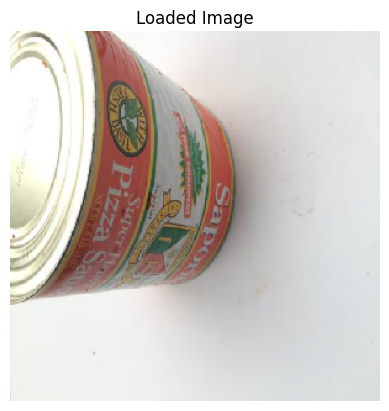

In [14]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
test_img = '/home/khlaed/Videos/Garbage_Segregation-main/Data/Train/metal/metal1.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [15]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.0 %
GLASS : 0.0 %
METAL : 100.0 %
PAPER : 0.0 %
PLASTIC : 0.0 %
TRASH : 0.0 %


1/1 [==============================] - 0s 29ms/step
Probability: 0.99992585
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

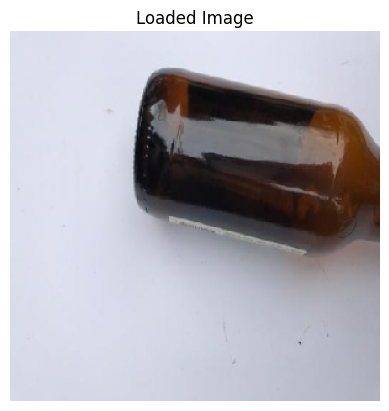

In [16]:
test_img = 'Data/Test/glass/glass421.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [17]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.0 %
GLASS : 99.99 %
METAL : 0.0 %
PAPER : 0.0 %
PLASTIC : 0.01 %
TRASH : 0.0 %


1/1 [==============================] - 0s 29ms/step
Probability: 0.9989724
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

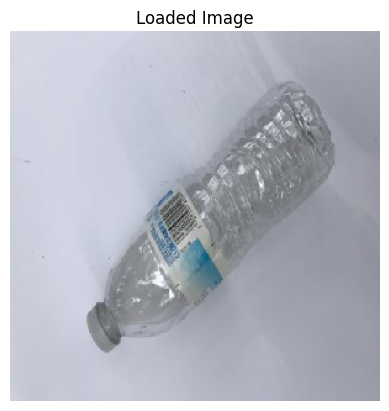

In [18]:
test_img = 'Data/Test/plastic/plastic425.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [19]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.01 %
GLASS : 0.05 %
METAL : 0.02 %
PAPER : 0.02 %
PLASTIC : 99.9 %
TRASH : 0.0 %


### *Testing shows that the model is fairly successful in classifying the type of waste*

## ***Saving model as 'model.h5'***

In [20]:
model.save('weights/model.h5')